# Decision Trees

Decision Trees are a fundamental supervised learning algorithm in machine learning, widely used for both **classification** and **regression** tasks. They offer an intuitive, tree-like model of decisions that mimic human decision-making processes, making them highly interpretable. 

---

### **What are Decision Trees?**
- A decision tree is a flowchart-like model that makes decisions by recursively splitting the feature space into regions based on feature values. 
- Each internal node represents a decision (split) on a feature, each branch represents an outcome of that decision, and each leaf node represents a final prediction (class or value).
- The process continues until it reaches **leaf nodes**, which represent the final output either a class label (classification) or a numerical value (regression).


### **Why Use Decision Trees?**
- **Interpretability**: Easy to understand and visualize.
- **Non-Linearity**: Captures complex relationships without assuming linearity.
- **Versatility**: Handles both classification (e.g., spam vs. not spam) and regression (e.g., predicting house prices).
- **Feature Importance**: Identifies key predictors.

### **How They Work**
1. **Root Node**: Start with the entire dataset.
2. **Splitting**: Divide data based on a feature and threshold that best separates the target variable (using criteria like Gini impurity or entropy).
3. **Leaf Nodes**: Stop splitting when a condition is met (e.g., max depth, minimum samples).
4. **Pruning**: Removing unnecessary branches to prevent overfitting.

## **Key Concepts and Methods**

### **a. Splitting Criteria**

#### For Classification
1. **Gini Impurity**:
   - Measures the probability of incorrectly classifying a randomly chosen element if it were labeled according to the distribution of labels in the subset.
   - Formula:  
    ```math 
        Gini = 1 - \sum_{i=1}^{n} p_i^2
    ```
     where \( p_i \) is the proportion of instances of class \( i \).
   - Lower Gini impurity indicates a better split.
2. **Entropy (Information Gain)**:
   - Measures the uncertainty or disorder in the data, rooted in information theory.
   - **Entropy formula**:  
    ```math
        Entropy = -\sum_{i=1}^{n} p_i \log_2(p_i)
    ```
   - Information Gain is the reduction in entropy after a split:  
    ```math
        IG = Entropy_{parent} - \sum_{child} \frac{N_{child}}{N_{parent}} Entropy_{child}
    ```
   - Higher Information Gain means a better split.

#### For Regression
- **Mean Squared Error (MSE)**:
   - Measures the average squared difference between actual and predicted values in a leaf.
   - Formula:  
     ```math
        MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2
     ```
     where \( y_i \) is the actual value and \( \bar{y} \) is the mean value in the leaf.
   - The split that minimizes MSE (or variance) is chosen.

The algorithm selects the feature and threshold that optimizes the chosen criterion at each step.

### Algorithms
- **CART (Classification and Regression Trees)**:
  - Uses a **binary splitting technique**.
  - Uses Gini impurity (classification) or MSE (regression).
  - Basis for scikit-learn’s implementation.
- **ID3**:
  - Uses entropy and information gain; handles categorical features.
- **C4.5**:
  - An improvement over ID3; supports continuous features and pruning.

---

### **b. Hyperparameters**
- `max_depth`: Limits tree depth to prevent overfitting.
- `min_samples_split`: Minimum samples required to split a node.
- `min_samples_leaf`: Minimum samples in a leaf node.
- `criterion`: Splitting metric (e.g., "gini", "entropy", "mse").

---

## Overfitting and Pruning

Decision Trees can grow complex and overfit the training data, capturing noise rather than general patterns. To mitigate this:

### Pre-Pruning
- Stop tree growth early using constraints:
  - **max_depth**: Limits the tree’s depth.
  - **min_samples_split**: Minimum samples required to split a node.
  - **min_samples_leaf**: Minimum samples required in a leaf node.

### Post-Pruning
- Build the full tree, then remove branches with low predictive power:
  - **Cost Complexity Pruning**: Balances tree complexity and accuracy using a parameter (e.g., `ccp_alpha` in scikit-learn).
  - Removes nodes that don’t significantly improve performance on a validation set.

---

## **3. Practical Examples**

### **Example 1: Binary Classification (Iris Dataset)**

Below is a complete example using the Iris dataset, including data preparation, training, tuning, evaluation, and visualization.

Best parameters: {'max_depth': 4, 'min_samples_split': 2}
Accuracy: 1.00


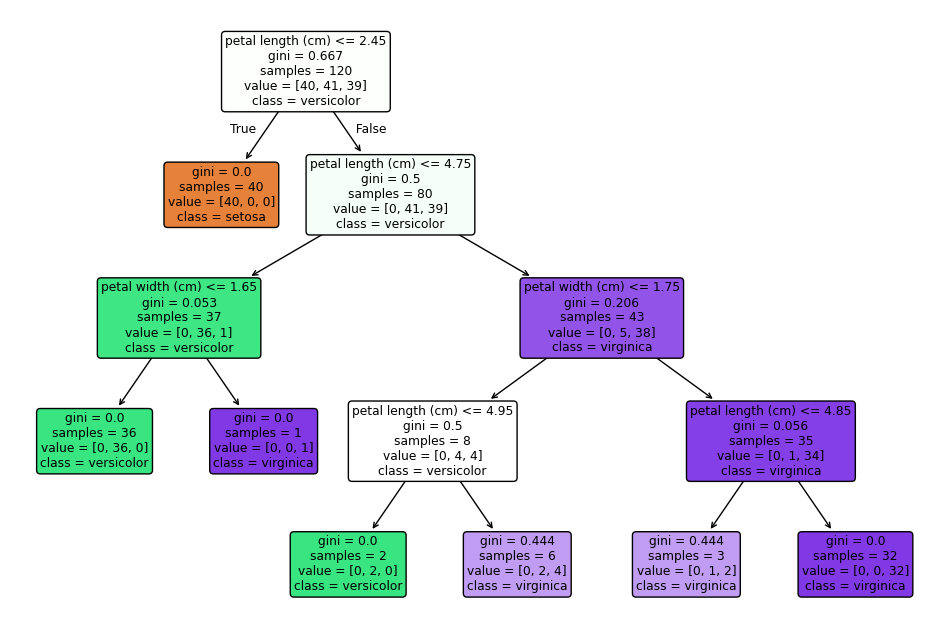

Predicted class: setosa
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.9363
petal width (cm): 0.0637


In [1]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (setosa, versicolor, virginica)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for tuning
param_grid = {'max_depth': [1, 2, 3, 4, 5, None], 'min_samples_split': [2, 5, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

# Predict and evaluate on test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(best_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# Example prediction
new_sample = [[5.0, 3.5, 1.5, 0.2]]  # Sample measurements
prediction = best_clf.predict(new_sample)
print(f"Predicted class: {iris.target_names[prediction[0]]}")

# Feature importances
importances = best_clf.feature_importances_
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance:.4f}")

### Explanation
1. **Data Preparation**:
   - Loads the Iris dataset, splits it into 80% training and 20% testing sets.
2. **Model Training**:
   - Uses `DecisionTreeClassifier` with default Gini criterion.
3. **Hyperparameter Tuning**:
   - `GridSearchCV` tests combinations of `max_depth` and `min_samples_split` using 5-fold cross-validation.
4. **Evaluation**:
   - Computes accuracy on the test set.
5. **Visualization**:
   - Uses `plot_tree` to display the tree structure.
6. **Prediction**:
   - Predicts the species for a new sample.
7. **Feature Importance**:
   - Shows which features (e.g., petal length) most influence decisions.

### Output (Sample)
- **Best parameters**: e.g., `{'max_depth': 3, 'min_samples_split': 2}`
- **Accuracy**: e.g., `0.97` (97%)
- **Visualization**: A tree diagram showing splits and decisions.
- **Prediction**: e.g., `setosa`
- **Feature Importances**: e.g., `petal length (cm): 0.5612` (most influential).

---

### **Example 2: Regression**

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Synthetic regression data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

# Fit regression tree
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X, y)

# Predict
y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

# Visualize
plt.scatter(X, y, label="Data", alpha=0.5)
plt.plot(X, y_pred, color="red", label="Tree Fit")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

NameError: name 'np' is not defined

**Example 3: Visualizing the Tree**
- **Visualization Alternatives**:
  - Use `export_graphviz` with Graphviz for more detailed renders (requires installation).

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Fit Iris binary classifier
clf.fit(X_train, y_train)

# Export tree
dot_data = export_graphviz(clf, feature_names=["Sepal_Length", "Petal_Length"],
                           class_names=["Setosa", "Non-Setosa"], filled=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree", view=True)  # Creates iris_tree.pdf

---

## **4. Tools and Methods Summary**
- **Modeling**: `sklearn.tree.DecisionTreeClassifier`, `DecisionTreeRegressor`.
- **Evaluation**: `sklearn.metrics.accuracy_score`, `mean_squared_error`.
- **Visualization**: `matplotlib.pyplot.contourf()`, `graphviz`.
- **Feature Importance**: `.feature_importances_`.

---

## **Limitations**:
  - Sensitive to small data changes; may require ensemble methods for robustness.
  - Struggles with imbalanced datasets unless adjusted (e.g., class weights).

**Ensemble Methods**:
  - Decision Trees are building blocks for **Random Forests** (bagging) and **Gradient Boosting** (boosting), which improve performance by combining multiple trees.

---

## Example: Play Tennis Dataset

To illustrate, consider a simple dataset deciding whether to play tennis based on weather conditions:

| Day | Outlook  | Temperature | Humidity | Wind  | Play Tennis |
|-----|----------|-------------|----------|-------|-------------|
| 1   | Sunny    | Hot         | High     | Weak  | No          |
| 2   | Sunny    | Hot         | High     | Strong| No          |
| 3   | Overcast | Hot         | High     | Weak  | Yes         |
| 4   | Rain     | Mild        | High     | Weak  | Yes         |
| 5   | Rain     | Cool        | Normal   | Weak  | Yes         |
| 6   | Rain     | Cool        | Normal   | Strong| No          |
| 7   | Overcast | Cool        | Normal   | Strong| Yes         |
| 8   | Sunny    | Mild        | High     | Weak  | No          |
| 9   | Sunny    | Cool        | Normal   | Weak  | Yes         |
| 10  | Rain     | Mild        | Normal   | Weak  | Yes         |

A Decision Tree might split as follows:
- **Root Node**: Split on "Outlook".
  - **Outlook = Overcast**: All instances are "Yes" → Leaf node (Yes).
  - **Outlook = Sunny**: Split on "Humidity".
    - **Humidity = High**: All "No" → Leaf node (No).
    - **Humidity = Normal**: All "Yes" → Leaf node (Yes).
  - **Outlook = Rain**: Split on "Wind".
    - **Wind = Strong**: All "No" → Leaf node (No).
    - **Wind = Weak**: All "Yes" → Leaf node (Yes).

This tree classifies whether to play tennis based on sequential feature checks.

---